# Import dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_local = pd.read_csv(r'C:\Users\phuct\Downloads\SyncToLaptop\Project\Personal-Project\Mobile App\Farmers Friend\tests_1\benchmark_results.csv')
df_gemini = pd.read_csv(r'C:\Users\phuct\Downloads\SyncToLaptop\Project\Personal-Project\Mobile App\Farmers Friend\tests_1\benchmark_gemini_results_final.csv')


In [2]:
df_local

,True Label,Filename,Predicted Label
0,Apple___alternaria_leaf_spot,112927.jpg,Tomato___Late_blight
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___Cedar_apple_rust
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___Black_rot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___Cedar_apple_rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy
...,...,...,...
2585,Potato___mosaic_virus,112877.jpg,Tomato___Late_blight
2586,Potato___mosaic_virus,112879.jpg,Tomato___Spider_mites Two-spotted_spider_mite
2587,Potato___mosaic_virus,112892.jpg,Strawberry___Leaf_scorch
2588,Potato___mosaic_virus,112904.jpg,Tomato___Spider_mites Two-spotted_spider_mite


In [3]:
df_gemini

,True Label,Filename,Gemini Prediction
0,Apple___alternaria_leaf_spot,112927.jpg,Spider mites
1,Apple___alternaria_leaf_spot,112928.jpg,Apple rust
2,Apple___alternaria_leaf_spot,112931.jpg,Leaf spot disease
3,Apple___alternaria_leaf_spot,112934.jpg,Cedar-apple rust
4,Apple___alternaria_leaf_spot,112935.jpg,healthy
...,...,...,...
2585,Potato___mosaic_virus,112877.jpg,Potato virus Y (PVY)
2586,Potato___mosaic_virus,112879.jpg,healthy
2587,Potato___mosaic_virus,112892.jpg,Potato leafroll virus
2588,Potato___mosaic_virus,112904.jpg,healthy


# 1. Explore the data

## Local Model

In [4]:
df_local.shape

(2590, 3)

In [5]:
df_local.head()

,True Label,Filename,Predicted Label
0,Apple___alternaria_leaf_spot,112927.jpg,Tomato___Late_blight
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___Cedar_apple_rust
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___Black_rot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___Cedar_apple_rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy


In [6]:
df_local.describe

<bound method NDFrame.describe of                         True Label    Filename  \
0     Apple___alternaria_leaf_spot  112927.jpg   
1     Apple___alternaria_leaf_spot  112928.jpg   
2     Apple___alternaria_leaf_spot  112931.jpg   
3     Apple___alternaria_leaf_spot  112934.jpg   
4     Apple___alternaria_leaf_spot  112935.jpg   
...                            ...         ...   
2585         Potato___mosaic_virus  112877.jpg   
2586         Potato___mosaic_virus  112879.jpg   
2587         Potato___mosaic_virus  112892.jpg   
2588         Potato___mosaic_virus  112904.jpg   
2589         Potato___mosaic_virus  112920.jpg   

                                    Predicted Label  
0                              Tomato___Late_blight  
1                          Apple___Cedar_apple_rust  
2                                 Apple___Black_rot  
3                          Apple___Cedar_apple_rust  
4                                   Apple___healthy  
...                                      

## Gemini

In [7]:
df_gemini.shape

(2590, 3)

In [8]:
df_gemini.head()

,True Label,Filename,Gemini Prediction
0,Apple___alternaria_leaf_spot,112927.jpg,Spider mites
1,Apple___alternaria_leaf_spot,112928.jpg,Apple rust
2,Apple___alternaria_leaf_spot,112931.jpg,Leaf spot disease
3,Apple___alternaria_leaf_spot,112934.jpg,Cedar-apple rust
4,Apple___alternaria_leaf_spot,112935.jpg,healthy


In [9]:
df_gemini.describe

<bound method NDFrame.describe of                         True Label    Filename      Gemini Prediction
0     Apple___alternaria_leaf_spot  112927.jpg           Spider mites
1     Apple___alternaria_leaf_spot  112928.jpg             Apple rust
2     Apple___alternaria_leaf_spot  112931.jpg      Leaf spot disease
3     Apple___alternaria_leaf_spot  112934.jpg       Cedar-apple rust
4     Apple___alternaria_leaf_spot  112935.jpg                healthy
...                            ...         ...                    ...
2585         Potato___mosaic_virus  112877.jpg   Potato virus Y (PVY)
2586         Potato___mosaic_virus  112879.jpg                healthy
2587         Potato___mosaic_virus  112892.jpg  Potato leafroll virus
2588         Potato___mosaic_virus  112904.jpg                healthy
2589         Potato___mosaic_virus  112920.jpg    Nutrient Deficiency

[2590 rows x 3 columns]>

# Data Cleaning

In [10]:
df_local.isna().sum().sum()

0

In [11]:
df_local.isnull().sum().sum()

0

In [12]:
df_gemini.isna().sum().sum()

0

In [13]:
df_gemini.isnull().sum().sum()

0

# Data transformation without plants name in prediction

In [46]:
df_group = df_gemini.copy()

# Split the 'True Label' column and convert to lowercase
df_group[['Plants', 'Disease']] = df_group['True Label'].str.split('___', expand=True).map(lambda x: x.lower() if isinstance(x, str) else x)
df_group.pop('True Label')

# Insert at the beginning
df_group.insert(0, 'True Label', df_group.pop('Disease'))
df_group.insert(0, 'Plants', df_group.pop('Plants'))

# To lower case of True Label 
df_group["True Label"] = df_group["True Label"].str.replace("_"," ")

# Insert Local prediction to lower case
df_group.insert(len(df_group.columns), "Local Prediction",df_local["Predicted Label"].str.split('___', expand=True)[1].str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x))

#Insert Gemini Prediction to lower case
gemini_prediction = df_group.pop('Gemini Prediction')
df_group.insert(len(df_group.columns), "Gemini Prediction",gemini_prediction.str.replace("-"," ").map(lambda x: x.lower() if isinstance(x, str) else x))


filename = df_group.pop('Filename')
df_group.insert(len(df_group.columns), 'Filename', filename)

In [16]:
# Enforce as Strings
df_group['True Label'] = df_group['True Label'].astype(str)
df_group['Local Prediction'] = df_group['Local Prediction'].astype(str)
df_group['Gemini Prediction'] = df_group['Gemini Prediction'].astype(str)

# Make new df
df_group_similarity_scores = pd.DataFrame()
df_group_similarity_scores['Plants'] = df_group['Plants']
df_group_similarity_scores['True Label'] = df_group['True Label']

## Use Spacy for similarity

In [128]:
import spacy
# Load a pre-trained NLP model
nlp = spacy.load("en_core_web_lg")  # Medium model that includes word vectors

# Convert text to doc objects
def similarity_spacy(true_label, predictions):
    true_label_doc = nlp(true_label)
    prediction_docs = nlp(predictions)
    # prediction_docs = [nlp(pred) for pred in predictions]
    similarity = true_label_doc.similarity(prediction_docs)
    return similarity
    # Calculate and print similarity scores
    # for pred, doc in zip(predictions, prediction_docs):
    #     similarity = true_label_doc.similarity(doc)
    #     r# print(f"Similarity between '{true_label}' and '{pred}': {similarity:.2f}")


In [18]:
df_group_similarity_scores["Local Prediction Spacy"] = df_group.apply(lambda row: similarity_spacy(row["True Label"],row["Local Prediction"]), axis=1)
df_group_similarity_scores["Gemini Prediction Spacy"] = df_group.apply(lambda row: similarity_spacy(row["True Label"],row["Gemini Prediction"]), axis=1)

C:\Users\phuct\AppData\Local\Temp\ipykernel_34792\4199971510.py:10: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = true_label_doc.similarity(prediction_docs)


## User Bert for similarity

In [19]:
# Load model directly
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")

def similarity_bert(true_label, predictions):
    # Tokenize the text
    encoded_true_label = tokenizer(true_label, return_tensors="pt", padding=True, truncation=True)
    encoded_prediction = tokenizer(predictions, return_tensors="pt", padding=True, truncation=True)
    # encoded_predicted_labels = [tokenizer(label, return_tensors="pt", padding=True, truncation=True) for label in predictions]
    
    # Get embeddings without gradient calculation
    with torch.no_grad():
        true_label_embedding = model(**encoded_true_label).last_hidden_state.mean(dim=1)
        prediction_embedding = model(**encoded_prediction).last_hidden_state.mean(dim=1)
        # predicted_label_embeddings = [model(**label).last_hidden_state.mean(dim=1) for label in encoded_predicted_labels]
    
    from torch.nn.functional import cosine_similarity
    
    # Calculate cosine similarities
    similarities = cosine_similarity(true_label_embedding, prediction_embedding, dim=1).item()
    return similarities
        # similarities = [cosine_similarity(true_label_embedding, pred, dim=1).item() for pred in predicted_label_embeddings]

    # for similarity, prediction in zip(similarities, predictions):
    #     print(f"Similarity between '{true_label}' and '{prediction}': {similarity:.2f}")

C:\Users\phuct\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
df_group_similarity_scores["Local Prediction Bert"] = df_group.apply(lambda row: similarity_bert(row["True Label"],row["Local Prediction"]), axis=1)
df_group_similarity_scores["Gemini Prediction Bert"] = df_group.apply(lambda row: similarity_bert(row["True Label"],row["Gemini Prediction"]), axis=1)

# Analysis

In [40]:
df_group_similarity_scores.head()

,Plants,True Label,Local Prediction Spacy,Gemini Prediction Spacy,Local Prediction Bert,Gemini Prediction Bert
0,apple,alternaria leaf spot,0.444312,0.421683,0.633814,0.590645
1,apple,alternaria leaf spot,0.576781,0.564873,0.608941,0.570937
2,apple,alternaria leaf spot,0.520404,0.842528,0.515024,0.781996
3,apple,alternaria leaf spot,0.576781,0.576781,0.608941,0.608941
4,apple,alternaria leaf spot,0.333193,0.333193,0.430480,0.430480


## Group by Plants, True Label

In [27]:
# Group by Plants, Label
grouped_df_smilarity_score = df_group_similarity_scores.groupby(['Plants', 'True Label']).mean()

In [28]:
grouped_df_smilarity_score

Local Prediction Spacy  \
Plants      True Label                                     
apple       alternaria leaf spot                0.521238   
            black rot                           1.000000   
            brown spot                          0.339375   
            gray spot                           0.361758   
            healthy                             0.855511   
            rust                                0.607483   
            scab                                0.738576   
bell_pepper bacterial spot                      1.000000   
            healthy                             1.000000   
blueberry   healthy                             1.000000   
cassava     bacterial blight                    0.513510   
            brown streak disease                0.463221   
            green mottle                        0.482546   
            healthy                             0.290532   
            mosaic disease                      0.388057   
cherry      healthy                             1.000000   
            powdery mildew                      1.000000   
coffee      healthy                             0.234347   
            red spider mite                     0.517459   
            rust                                0.483936   
corn        common rust                         1.000000   
            gray leaf spot                      0.960903   
            healthy                             1.000000   
            northern leaf blight                1.000000   
grape       black measles                       0.557576   
            black rot                           1.000000   
            healthy                             0.617605   
            leaf blight                         0.809944   
orange      citrus greening                     0.679066   
peach       bacterial spot                      1.000000   
            healthy                             1.000000   
potato      bacterial wilt                      0.475529   
            early blight                        0.662779   
            healthy                             0.550263   
            late blight                         0.605007   
            leafroll virus                      0.334855   
            mosaic virus                        0.374420   

                                  Gemini Prediction Spacy  \
Plants      True Label                                      
apple       alternaria leaf spot                 0.502409   
            black rot                            0.481279   
            brown spot                           0.450119   
            gray spot                            0.335007   
            healthy                              0.928771   
            rust                                 0.584322   
            scab                                 0.717257   
bell_pepper bacterial spot                       0.460731   
            healthy                              0.875507   
blueberry   healthy                              0.976145   
cassava     bacterial blight                     0.487208   
            brown streak disease                 0.557289   
            green mottle                         0.381398   
            healthy                              0.680190   
            mosaic disease                       0.804376   
cherry      healthy                              1.000000   
            powdery mildew                       0.919736   
coffee      healthy                              0.888304   
            red spider mite                      0.479212   
            rust                                 0.427647   
corn        common rust                          0.866040   
            gray leaf spot                       0.738455   
            healthy                              0.915993   
            northern leaf blight                 0.649868   
grape       black measles                        0.257960   
            black rot                         

## Spacy

In [43]:
styled_df_Spacy_Category = grouped_df_smilarity_score[["Local Prediction Spacy","Gemini Prediction Spacy"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
styled_df_Spacy_Category

<Axes: xlabel='Plants,True Label'>

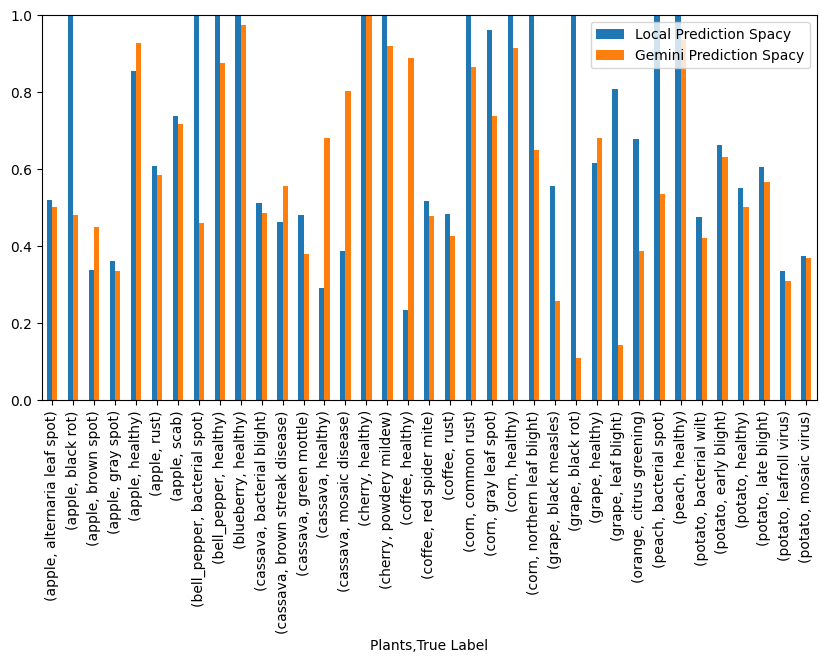

In [130]:
grouped_df_smilarity_score[["Local Prediction Spacy","Gemini Prediction Spacy"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))

## Bert

In [45]:
styled_df_Bert_Category = grouped_df_smilarity_score[["Local Prediction Bert","Gemini Prediction Bert"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
styled_df_Bert_Category

<Axes: xlabel='Plants,True Label'>

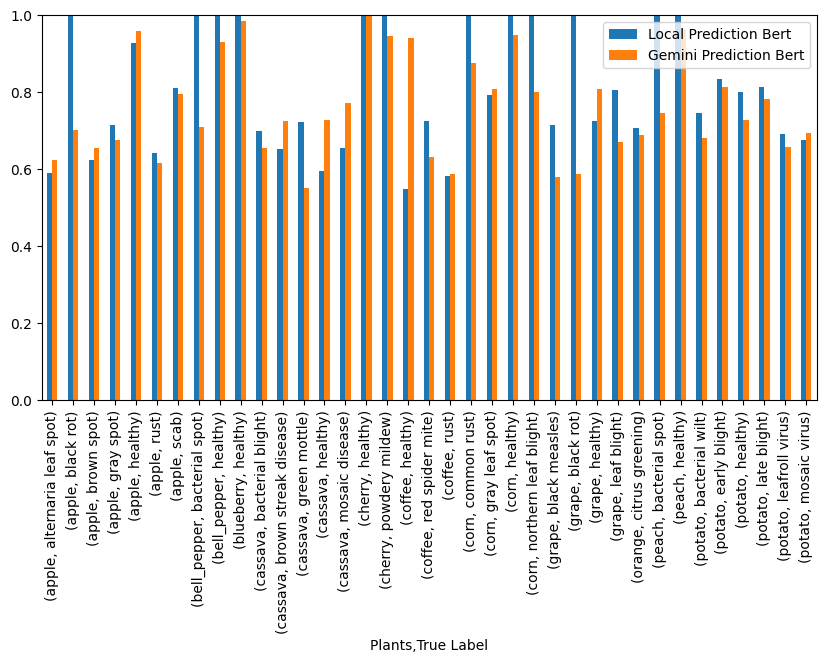

In [131]:
grouped_df_smilarity_score[["Local Prediction Bert","Gemini Prediction Bert"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))

## Group by Plants

## Spacy 

In [41]:
grouped_df_smilarity_score_by_PLants = grouped_df_smilarity_score.groupby(['Plants']).mean()

In [38]:
styled_df_Spacy = grouped_df_smilarity_score_by_PLants[["Local Prediction Spacy","Gemini Prediction Spacy"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
styled_df_Spacy

,Local Prediction Spacy,Gemini Prediction Spacy
Plants,,
apple,0.631992,0.571309
bell_pepper,1.000000,0.668119
blueberry,1.000000,0.976145
cassava,0.427573,0.582092
cherry,1.000000,0.959868
coffee,0.411914,0.598388
corn,0.990226,0.792589
grape,0.746281,0.298121
orange,0.679066,0.387623


<Axes: xlabel='Plants'>

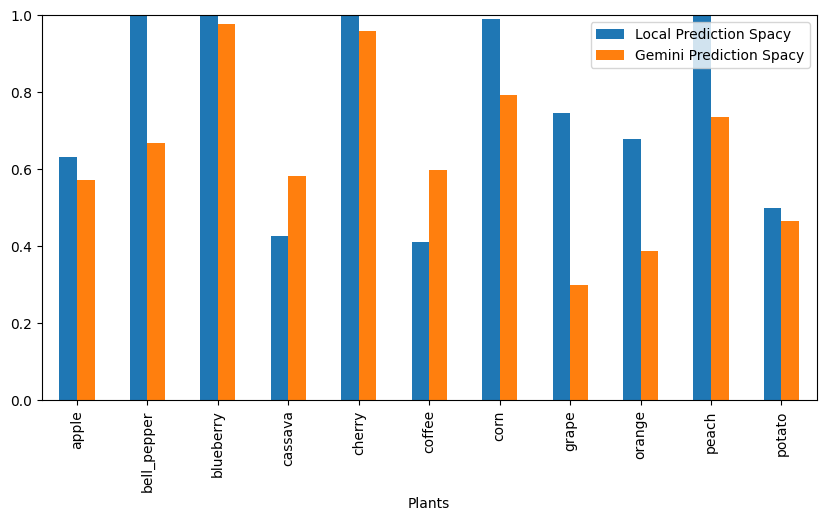

In [120]:
# plt.bar()
grouped_df_smilarity_score_by_PLants[["Local Prediction Spacy","Gemini Prediction Spacy"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))

## Bert

In [39]:
styled_df_Bert = grouped_df_smilarity_score_by_PLants[["Local Prediction Bert","Gemini Prediction Bert"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
styled_df_Bert

,Local Prediction Bert,Gemini Prediction Bert
Plants,,
apple,0.758950,0.718634
bell_pepper,1.000000,0.819503
blueberry,1.000000,0.984683
cassava,0.664986,0.686431
cherry,1.000000,0.973062
coffee,0.619222,0.720624
corn,0.948270,0.858274
grape,0.811361,0.661893
orange,0.707881,0.688462


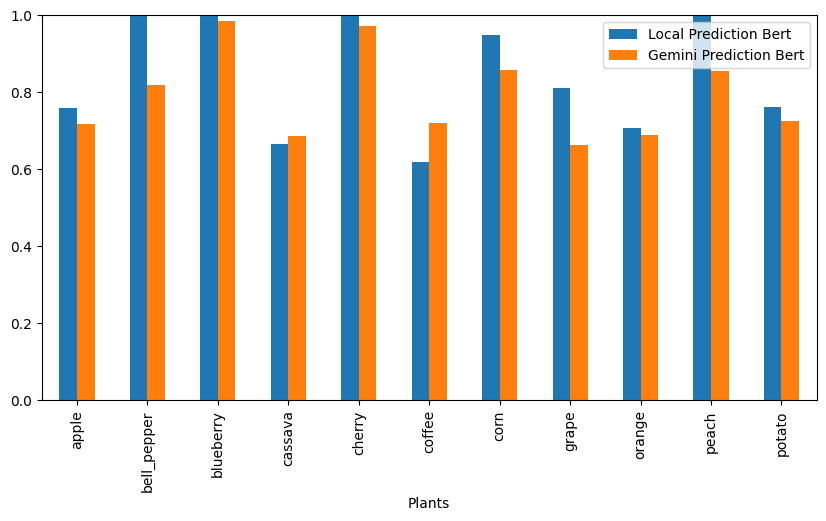

In [121]:
grouped_df_smilarity_score_by_PLants[["Local Prediction Bert","Gemini Prediction Bert"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))
plt.show

# Data transformation with plants name in prediction

In [60]:
# Copy from gemini
df_group_with_plants_name = df_gemini.copy()

In [63]:
# Replace __ and _ with space, and make it lower() for "True Label"
df_group_with_plants_name["True Label"] = df_group_with_plants_name["True Label"].str.replace("__"," ").str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x)

In [68]:
# Insert columns from Local
df_group_with_plants_name["Local Prediction"] = df_local["Predicted Label"].str.replace("__"," ").str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
df_group_with_plants_name.pop("Gemini Prediction")

In [77]:
df_group_with_plants_name["Gemini Prediction"] = df_gemini["Gemini Prediction"].str.replace("__"," ").str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x)

In [78]:
df_group_with_plants_name

,True Label,Filename,Local Prediction,Gemini Prediction
0,apple alternaria leaf spot,112927.jpg,tomato late blight,spider mites
1,apple alternaria leaf spot,112928.jpg,apple cedar apple rust,apple rust
2,apple alternaria leaf spot,112931.jpg,apple black rot,leaf spot disease
3,apple alternaria leaf spot,112934.jpg,apple cedar apple rust,cedar-apple rust
4,apple alternaria leaf spot,112935.jpg,apple healthy,healthy
...,...,...,...,...
2585,potato mosaic virus,112877.jpg,tomato late blight,potato virus y (pvy)
2586,potato mosaic virus,112879.jpg,tomato spider mites two-spotted spider mite,healthy
2587,potato mosaic virus,112892.jpg,strawberry leaf scorch,potato leafroll virus
2588,potato mosaic virus,112904.jpg,tomato spider mites two-spotted spider mite,healthy


# Analysis

## Use Spacy for similarity

In [81]:
df_group_with_plants_name["Local Prediction Spacy"] = df_group_with_plants_name.apply(lambda row: similarity_spacy(row["True Label"],row["Local Prediction"]), axis=1)
df_group_with_plants_name["Gemini Prediction Spacy"] = df_group_with_plants_name.apply(lambda row: similarity_spacy(row["True Label"],row["Gemini Prediction"]), axis=1)

C:\Users\phuct\AppData\Local\Temp\ipykernel_34792\4199971510.py:10: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = true_label_doc.similarity(prediction_docs)
C:\Users\phuct\AppData\Local\Temp\ipykernel_34792\4199971510.py:10: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = true_label_doc.similarity(prediction_docs)


## Use Bert for similarity

In [82]:
df_group_with_plants_name["Local Prediction Bert"] = df_group_with_plants_name.apply(lambda row: similarity_bert(row["True Label"],row["Local Prediction"]), axis=1)
df_group_with_plants_name["Gemini Prediction Bert"] = df_group_with_plants_name.apply(lambda row: similarity_bert(row["True Label"],row["Gemini Prediction"]), axis=1)

In [84]:
df_group_with_plants_name.pop("Local Prediction")
df_group_with_plants_name.pop("Gemini Prediction")

0                spider mites
1                  apple rust
2           leaf spot disease
3            cedar-apple rust
4                     healthy
                ...          
2585     potato virus y (pvy)
2586                  healthy
2587    potato leafroll virus
2588                  healthy
2589      nutrient deficiency
Name: Gemini Prediction, Length: 2590, dtype: object

In [86]:
df_group_with_plants_name.pop("Filename")

0       112927.jpg
1       112928.jpg
2       112931.jpg
3       112934.jpg
4       112935.jpg
           ...    
2585    112877.jpg
2586    112879.jpg
2587    112892.jpg
2588    112904.jpg
2589    112920.jpg
Name: Filename, Length: 2590, dtype: object

In [87]:
df_group_with_plants_name

,True Label,Local Prediction Spacy,Gemini Prediction Spacy,Local Prediction Bert,Gemini Prediction Bert
0,apple alternaria leaf spot,0.620189,0.397354,0.676884,0.588568
1,apple alternaria leaf spot,0.815822,0.789035,0.693441,0.622049
2,apple alternaria leaf spot,0.767339,0.768763,0.685047,0.769976
3,apple alternaria leaf spot,0.815822,0.724830,0.693441,0.630393
4,apple alternaria leaf spot,0.722546,0.376729,0.621882,0.453276
...,...,...,...,...,...
2585,potato mosaic virus,0.604868,0.635584,0.752068,0.752899
2586,potato mosaic virus,0.585422,0.338542,0.613632,0.496292
2587,potato mosaic virus,0.528990,0.907139,0.665819,0.881809
2588,potato mosaic virus,0.585422,0.338542,0.613632,0.496292


# Group by True Label

In [103]:
df_group_with_plants_name = df_group_with_plants_name.groupby(["True Label"]).mean()

In [104]:
df_group_with_plants_name_spacy = df_group_with_plants_name[["Local Prediction Spacy","Gemini Prediction Spacy"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
df_group_with_plants_name_spacy

,Local Prediction Spacy,Gemini Prediction Spacy
True Label,,
apple alternaria leaf spot,0.770089,0.663792
apple black rot,1.000000,0.639516
apple brown spot,0.185676,0.593246
apple gray spot,0.599194,0.574837
apple healthy,0.912615,0.757408
apple rust,0.823531,0.834248
apple scab,0.912413,0.902842
bell pepper bacterial spot,0.966369,0.479142
bell pepper healthy,0.959165,0.578736


<function matplotlib.pyplot.show(close=None, block=None)>

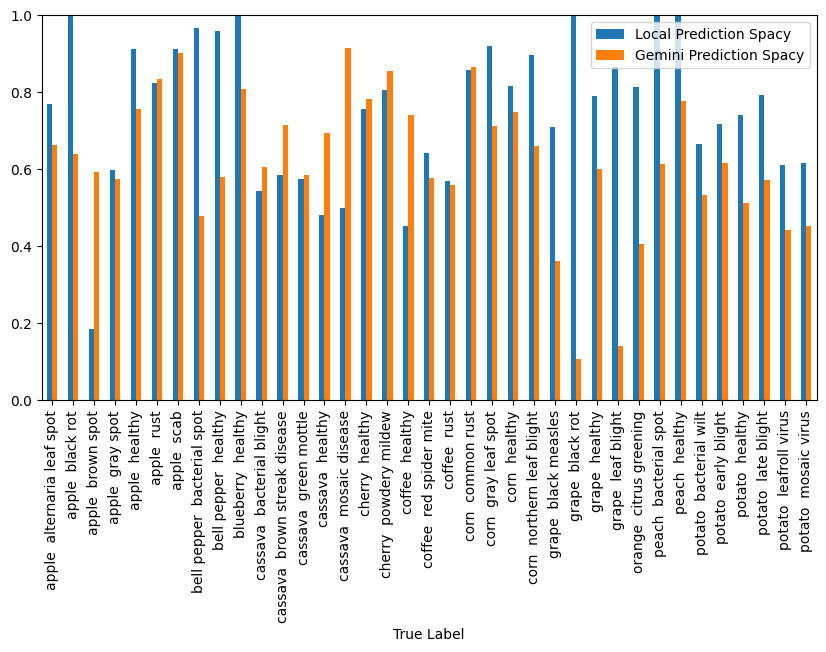

In [122]:
df_group_with_plants_name[["Local Prediction Spacy","Gemini Prediction Spacy"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))
plt.show

In [105]:
df_group_with_plants_name_bert = df_group_with_plants_name[["Local Prediction Bert","Gemini Prediction Bert"]].style.highlight_max(axis=1, color='darkgreen', props='font-weight:bold;')
df_group_with_plants_name_bert

,Local Prediction Bert,Gemini Prediction Bert
True Label,,
apple alternaria leaf spot,0.686078,0.650848
apple black rot,1.000000,0.750410
apple brown spot,0.546513,0.693250
apple gray spot,0.688088,0.743703
apple healthy,0.930182,0.783790
apple rust,0.785445,0.841860
apple scab,0.884043,0.944500
bell pepper bacterial spot,0.879654,0.666349
bell pepper healthy,0.793157,0.633636


<function matplotlib.pyplot.show(close=None, block=None)>

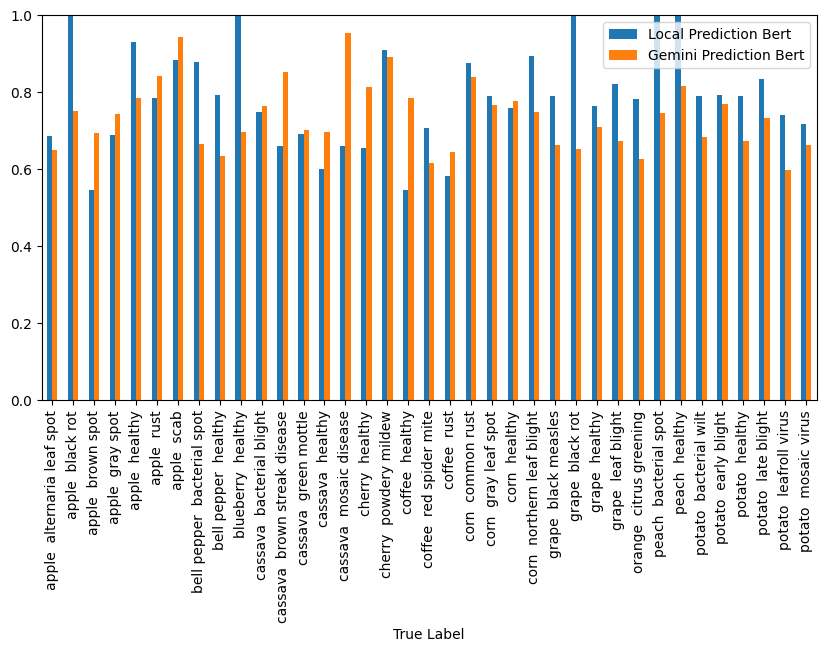

In [123]:
df_group_with_plants_name[["Local Prediction Bert","Gemini Prediction Bert"]].plot(kind='bar', figsize=(10, 5), ylim=(0, 1))
plt.show